# 1. MNIST Classifier

### Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Download MNIST dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)

### Explore MNIST dataset

#### MNIST dataset keys

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#### Prepare the data

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

#### Showing digits

In [7]:
def show_digit(digit_image):
    digit_image = digit_image.reshape(28, 28)
    plt.imshow(digit_image, cmap=mpl.cm.binary)
    plt.axis("off")
    plt.show()

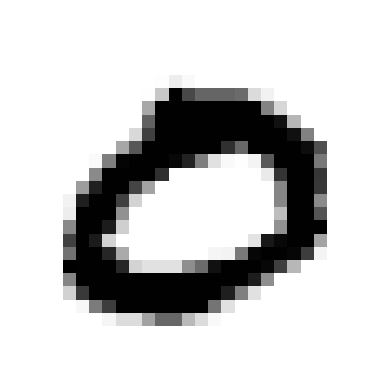

In [8]:

digit_index_for_dataset = random.randrange(len(X))

digit_image = X[digit_index_for_dataset]
show_digit(digit_image)

#### Show 100 digits

In [9]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

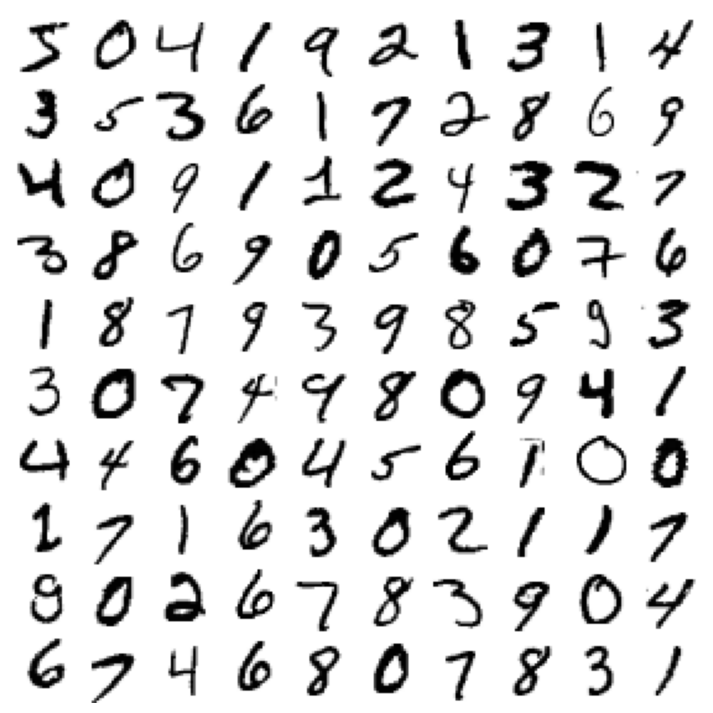

In [10]:
plt.figure(figsize=(9,9))
digit_images = X[:100]
plot_digits(digit_images, images_per_row=10)
plt.show()

### Split the dataset

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
X_train.shape

(60000, 784)

In [13]:
X_test.shape

(10000, 784)

In [14]:
y_train.shape

(60000,)

In [15]:
y_test.shape

(10000,)

#### Showing the dataset labels

In [16]:
y_test

array(['7', '2', '1', ..., '4', '5', '6'], shape=(10000,), dtype=object)

### Finding the best hyperparameter with Grid Search

In [17]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  14.9s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  13.3s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  13.6s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  14.1s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  12.7s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  12.9s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  13.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  19.7s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  13.2s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  13.0s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  13.3s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [18]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [19]:
grid_search.best_score_

np.float64(0.9716166666666666)

In [20]:
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

### Train model

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

### Get model metrics

In [22]:
y_pred = knn_model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 97.14%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix:
[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  10    5  995    2    1    0    0   16    3    0]
 [   0    1    3  974   

### Predict values

In [24]:
print(knn_model.predict([X_test[10]]))

['0']


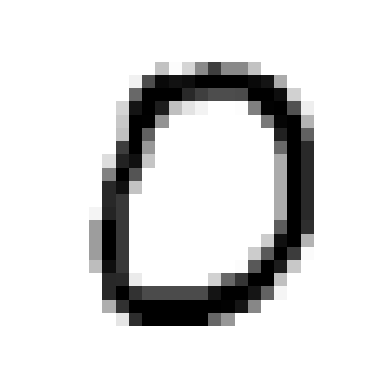

In [25]:
show_digit(X_test[10])

# 2. Data Augmentation Process

### Import libraries

In [26]:
from scipy.ndimage import shift

#### Augmentation functions

In [27]:
def shift_2d_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dx, dy], cval=0, mode="constant")
    return shifted_image.reshape([-1])

#### Apply and explore augmentation results

In [28]:
image = X_train[300]
shifted_image_right = shift_2d_image(image, 0, 5)
shifted_image_up = shift_2d_image(image, -5, 0)

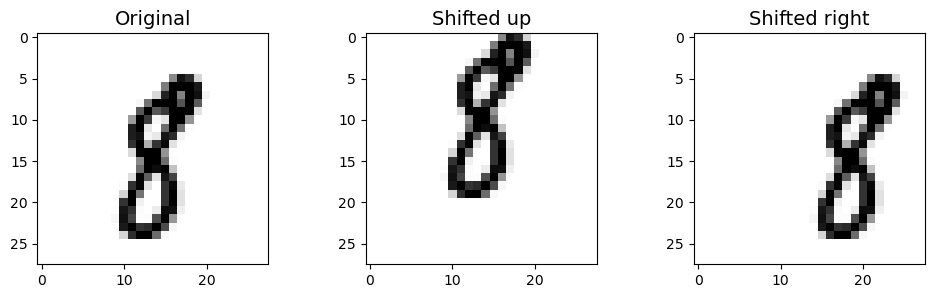

In [29]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted up", fontsize=14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

#### Clone train dataset

In [30]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

#### Apply augmentation process to dataset

In [31]:
COORDINATES_TO_SHIFT = ((1, 0), (-1, 0), (0, 1), (0, -1))

for dx, dy in COORDINATES_TO_SHIFT:
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_2d_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [32]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [33]:
X_train_augmented.shape

(300000, 784)

In [34]:
y_train_augmented.shape

(300000,)

#### Train model with Augmented Data

In [35]:
knn_model_with_augmented_data = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_model_with_augmented_data.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

#### Evaluate model with augmented data

In [36]:
y_pred = knn_model_with_augmented_data.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 97.63%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      1.00      0.98      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.99       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.95      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1132    2    0    0    0    0    0    0    1]
 [   6    2 1004    2    2    0    2   13    1    0]
 [   0    2    2  988   

By simply augmenting the data, we got a 0.5% accuracy boost. :)